### Histograms

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
%matplotlib inline

In [5]:
dataset1 = randn(100)

(array([  3.,   4.,   7.,  13.,  19.,  16.,  20.,   9.,   4.,   5.]),
 array([-1.99525275, -1.58562212, -1.17599149, -0.76636087, -0.35673024,
         0.05290038,  0.46253101,  0.87216164,  1.28179226,  1.69142289,
         2.10105352]),
 <a list of 10 Patch objects>)

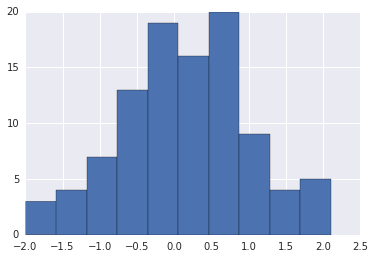

In [6]:
plt.hist(dataset1)

(array([  8.,   9.,  18.,  14.,  15.,   7.,   5.,   2.,   1.,   1.]),
 array([-1.57215771, -1.12015889, -0.66816007, -0.21616125,  0.23583757,
         0.68783639,  1.13983521,  1.59183403,  2.04383285,  2.49583167,
         2.94783049]),
 <a list of 10 Patch objects>)

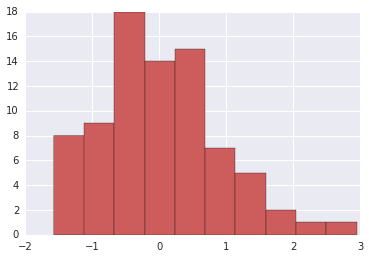

In [7]:
dataset2 = randn(80)
plt.hist(dataset2, color = 'indianred')

(array([ 0.11061976,  0.33185927,  0.11061976,  0.38716915,  0.22123952,
         0.7743383 ,  0.38716915,  0.38716915,  0.49778891,  0.33185927,
         0.22123952,  0.16592964,  0.22123952,  0.05530988,  0.05530988,
         0.05530988,  0.        ,  0.05530988,  0.        ,  0.05530988]),
 array([-1.57215771, -1.3461583 , -1.12015889, -0.89415948, -0.66816007,
        -0.44216066, -0.21616125,  0.00983816,  0.23583757,  0.46183698,
         0.68783639,  0.9138358 ,  1.13983521,  1.36583462,  1.59183403,
         1.81783344,  2.04383285,  2.26983226,  2.49583167,  2.72183108,
         2.94783049]),
 <a list of 20 Patch objects>)

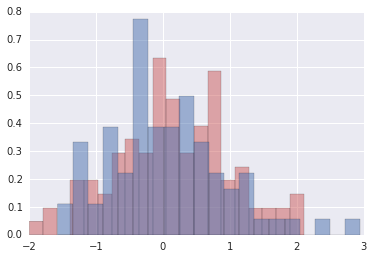

In [8]:
plt.hist(dataset1, normed = True, color = 'indianred', alpha = 0.5, bins = 20)
plt.hist(dataset2, normed = True, alpha = 0.5, bins = 20)
# since the two datasets have different number of points, they can be normalized
# using normed = True
# alpha sets the transparency and bins sets the number of bars

In [9]:
data1 = randn(1000)
data2 = randn(1000)

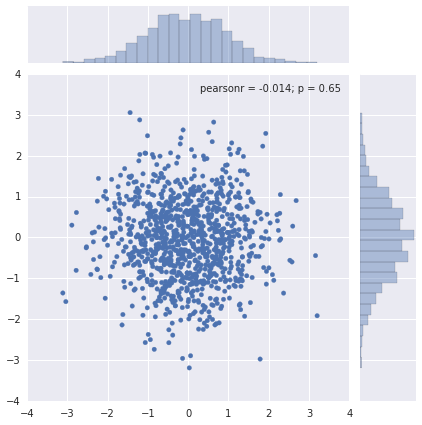

In [10]:
sns.jointplot(data1, data2)

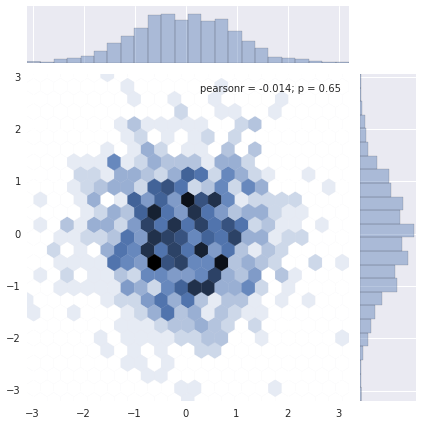

In [11]:
sns.jointplot(data1, data2, kind = 'hex')

### Kernel Density Estimate aka KDE plots

In [12]:
# carpet/rug plot
dataset = randn(25)

(0, 1)

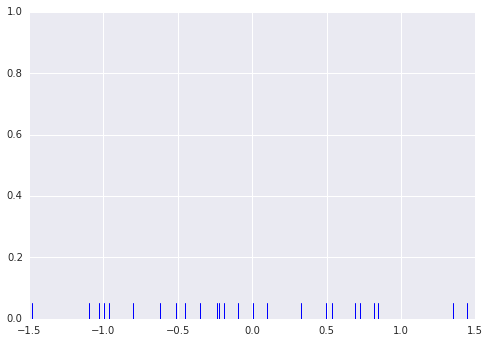

In [17]:
sns.rugplot(dataset)
plt.ylim(0, 1)

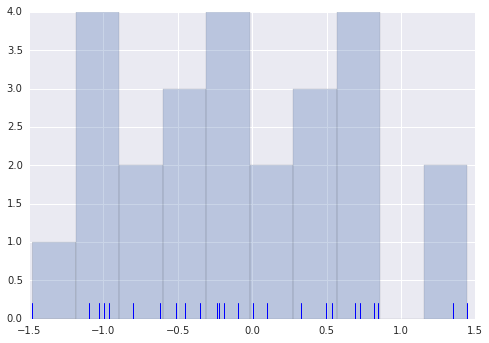

In [18]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

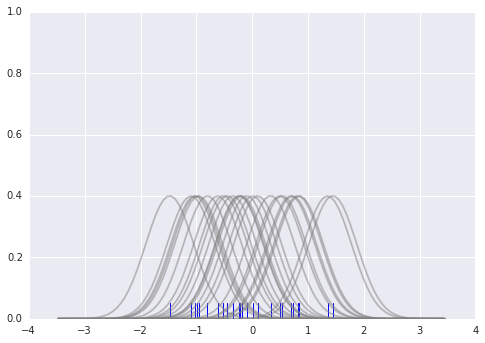

In [19]:
# manual KDE plot
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** 0.2
# equation as defined by KDE
kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # pdf = probability density function
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0, 1)

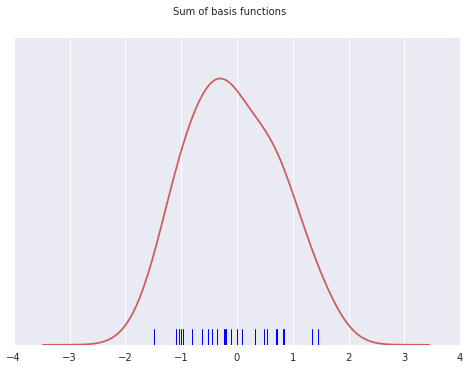

In [21]:
sum_of_kde = np.sum(kernel_list, axis = 0)
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset)
plt.yticks([]) # get rid of y ticks
plt.suptitle('Sum of basis functions')

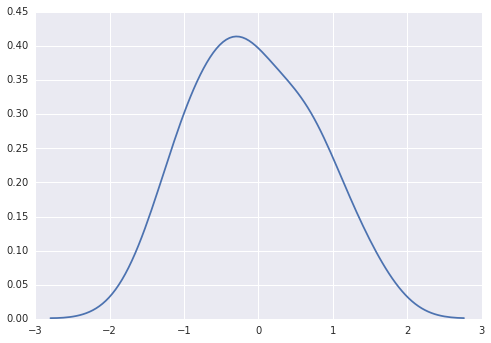

In [22]:
# automatic PDE plot
sns.kdeplot(dataset)

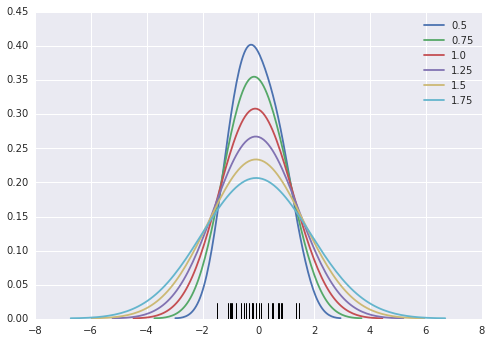

In [23]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw = bw, lw = 1.8, label = bw)
    # bw = bandwidth

In [24]:
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

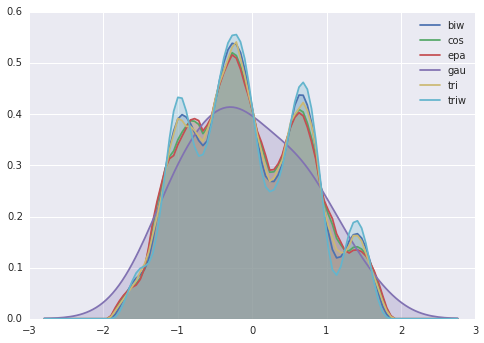

In [26]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern, shade = True)

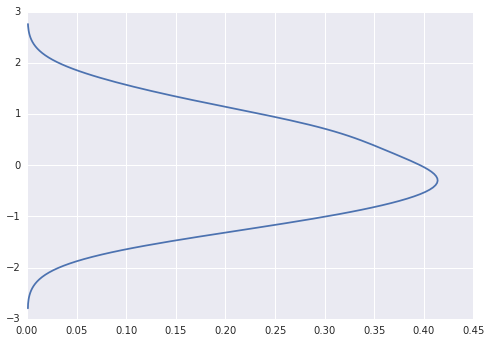

In [27]:
# plotting on y axis
sns.kdeplot(dataset, vertical = True)

In [28]:
# CDF (cumulative distributive function)
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

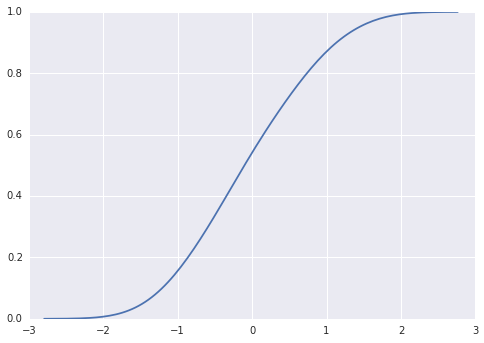

In [29]:
sns.kdeplot(dataset, cumulative = True)

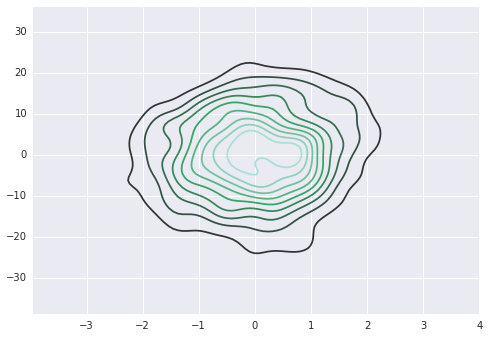

In [30]:
# mulitvariate density estimation
mean = [0, 0]
cov = [[1, 0], [0, 100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)
dframe = pd.DataFrame(dataset2, columns = ['X', 'Y'])
sns.kdeplot(dframe)

Instead of passing a whole dataframe, we can also pass the two vectors separately

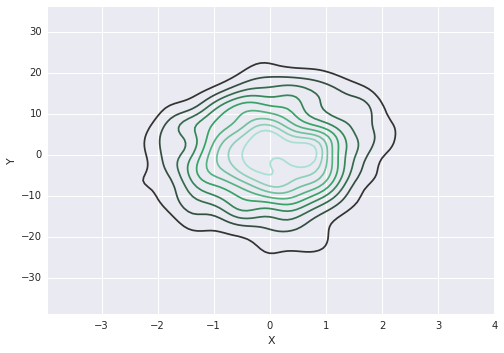

In [31]:
sns.kdeplot(dframe.X, dframe.Y)

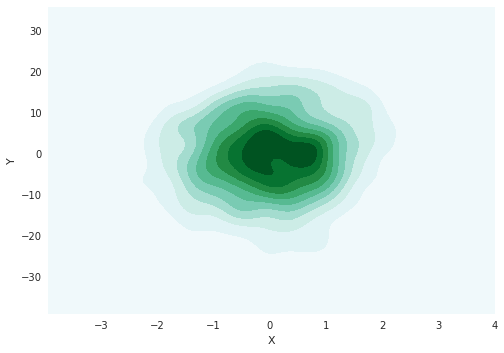

In [32]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

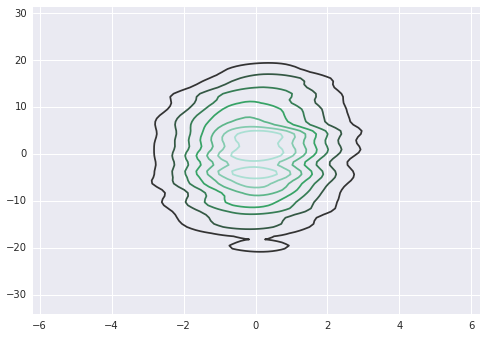

In [33]:
sns.kdeplot(dframe, bw = 1)

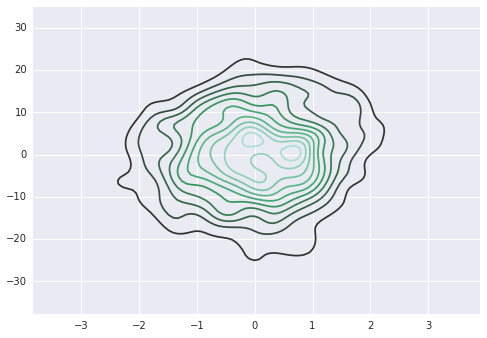

In [34]:
sns.kdeplot(dframe, bw = 'silverman')

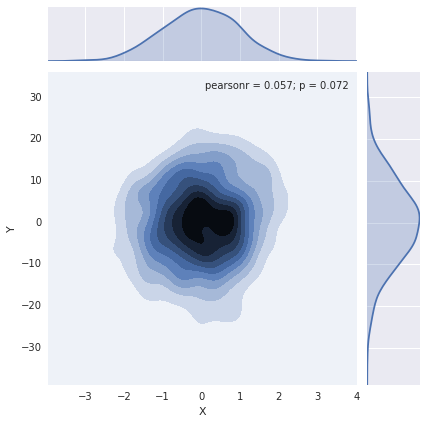

In [35]:
sns.jointplot('X', 'Y', dframe, kind = 'kde')

### Combining Plot Styles

In [5]:
dataset = randn(100)

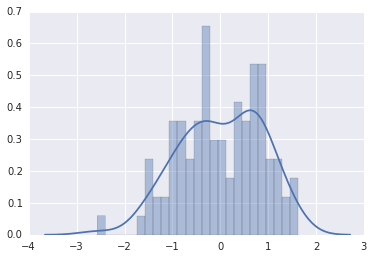

In [6]:
sns.distplot(dataset, bins = 25)

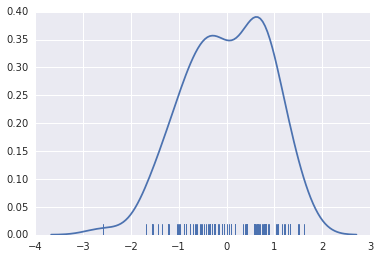

In [7]:
sns.distplot(dataset, bins = 25, rug = True, hist = False)

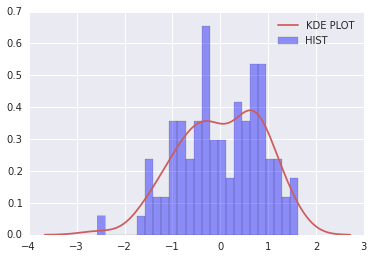

In [8]:
sns.distplot(dataset, bins = 25, kde_kws = {'color': 'indianred', 'label': 'KDE PLOT'},
                                            hist_kws = {'color': 'blue', 'label': 'HIST'})

In [10]:
from pandas import Series
ser1 = Series(dataset, name = 'My_data')
ser1

0    -1.683806
1     0.099261
2    -0.345059
3     0.782584
4     0.597004
5    -0.897031
6     0.801037
7     1.080773
8     0.611367
9    -1.221095
10    0.649136
11    1.283797
12   -1.208555
13   -1.356365
14    0.583899
15   -0.311042
16   -0.477873
17    1.065359
18   -0.238947
19    0.602502
20   -0.058730
21    1.205492
22   -0.103692
23   -0.755134
24    0.666905
25   -0.345715
26   -0.765072
27    0.817462
28   -0.372205
29   -0.243784
        ...   
70    0.677707
71   -0.428508
72    0.099493
73    1.322144
74    0.187455
75    0.861135
76    1.319885
77    1.500425
78   -0.983273
79   -0.658922
80    0.174152
81   -0.502470
82   -2.572773
83    0.425468
84   -0.264170
85   -1.555516
86   -0.101592
87    0.435792
88   -0.885442
89   -0.979321
90    0.004504
91    0.820496
92   -1.549546
93   -0.621869
94    0.046936
95    0.568819
96    0.702746
97    0.804025
98   -1.536543
99    1.067037
Name: My_data, dtype: float64

### Box and Violin Plots

In [11]:
url = 'http://en.wikipedia.org/wiki/Box_plot'

In [12]:
data1 = randn(100)
data2 = randn(100)

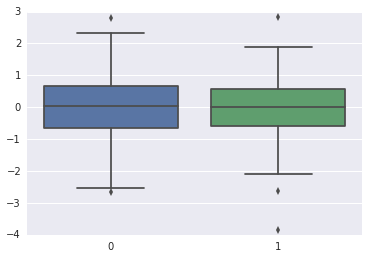

In [15]:
sns.boxplot(data = [data1, data2])

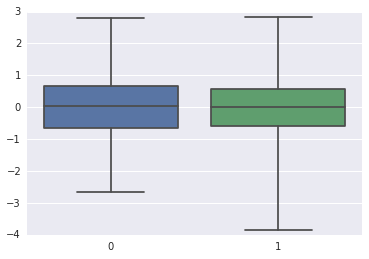

In [17]:
# in the above plot, we still see some outliers (diamond shaped points at the top and bottom)
# to include them in the plot, we need to set whisker to np.inf
sns.boxplot(data = [data1, data2], whis = np.inf)

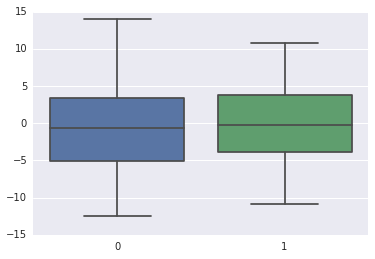

In [20]:
# Normal dist
data1 = stats.norm(0, 5).rvs(100)

# two gamma dist. concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50) - 1,
                        -1 * stats.gamma(5).rvs(50)])

# box plot of both
sns.boxplot(data = [data1, data2], whis = np.inf)

In [21]:
# sometimes boxplots might not give the full picture.
# this is when violin plots are useful. they combine kde plots with boxplots.

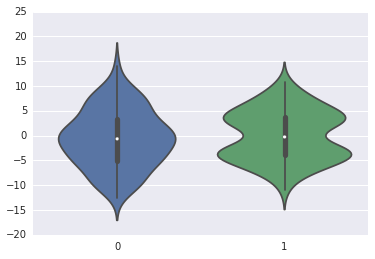

In [22]:
sns.violinplot(data = [data1, data2])

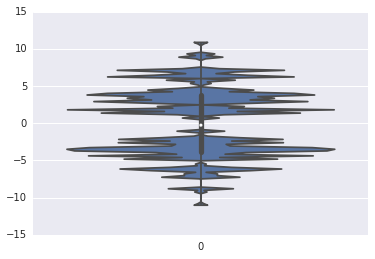

In [24]:
sns.violinplot(data = data2, bw = 0.01)
# since bw is very small, it is very sensitive to frequency

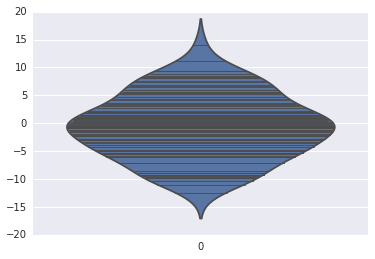

In [26]:
sns.violinplot(data = data1, inner = 'stick')

### Regression Plots

In [5]:
tips = sns.load_dataset('tips')
# loading sample dataset provided by seaborn
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


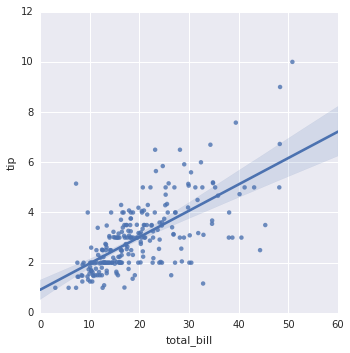

In [6]:
sns.lmplot('total_bill', 'tip', tips)

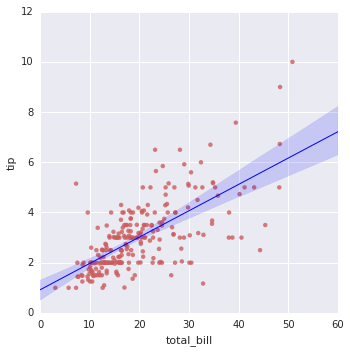

In [7]:
sns.lmplot('total_bill', 'tip', tips,
           scatter_kws = {'marker': 'o', 'color': 'indianred'},
           line_kws = {'linewidth': 1, 'color': 'blue'})

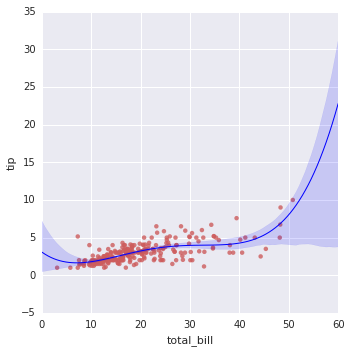

In [9]:
sns.lmplot('total_bill', 'tip', tips, order = 4,
           scatter_kws = {'marker': 'o', 'color': 'indianred'},
           line_kws = {'linewidth': 1, 'color': 'blue'})

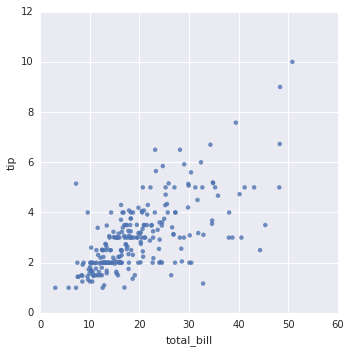

In [11]:
sns.lmplot('total_bill', 'tip', tips, fit_reg = False)
# fit_reg = fit regression line

In [14]:
tips['tip_pct'] = 100 * (tips['tip'] / tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


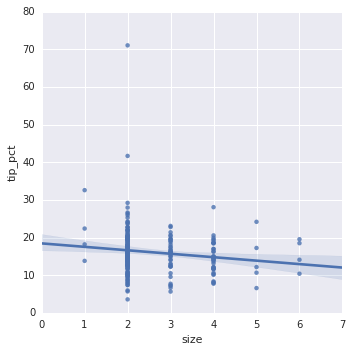

In [15]:
sns.lmplot('size', 'tip_pct', tips)

In [16]:
url = 'http://en.wikipedia.org/wiki/Jitter'

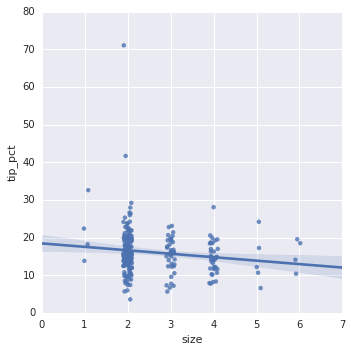

In [20]:
sns.lmplot('size', 'tip_pct', tips, x_jitter = 0.1)

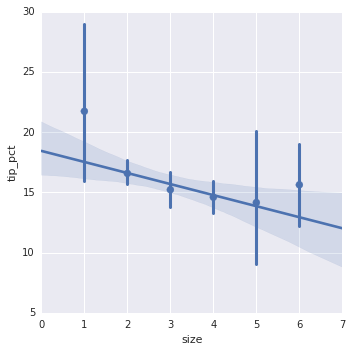

In [21]:
sns.lmplot('size', 'tip_pct', tips, x_estimator = np.mean)

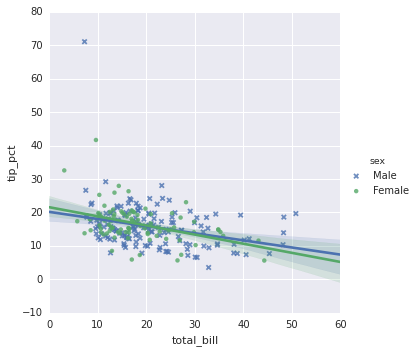

In [22]:
sns.lmplot('total_bill', 'tip_pct', tips, hue = 'sex', markers = ['x', 'o'])
# x = female o = male

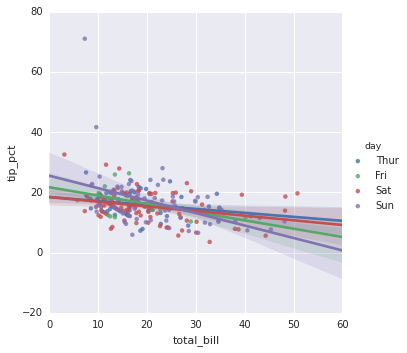

In [23]:
sns.lmplot('total_bill', 'tip_pct', tips, hue = 'day')

In [25]:
url = 'http://en.wikipedia.org/wiki/Local_regression'

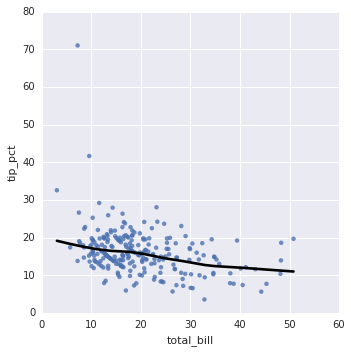

In [26]:
sns.lmplot('total_bill', 'tip_pct', tips, lowess = True, line_kws = {'color': 'black'})

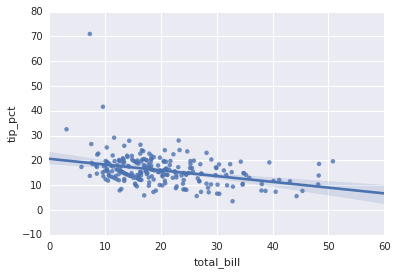

In [28]:
sns.regplot('total_bill', 'tip_pct', tips)
# regplot is the lower level function on top of which lmplot is built on

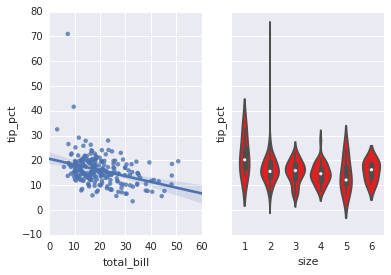

In [36]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey = True)

sns.regplot('total_bill', 'tip_pct', tips, ax = axis1)
sns.violinplot(x = 'size', y = 'tip_pct', data = tips.sort('size'), color = 'Red')

### Heatmaps and Clustered Matrices

In [60]:
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [61]:
len(flight_dframe)

144

In [62]:
flight_dframe = flight_dframe.pivot("month","year","passengers")
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


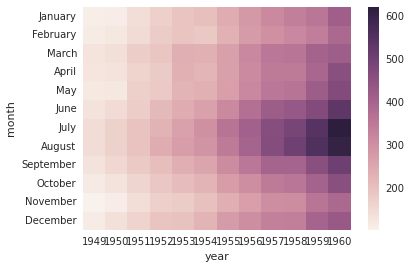

In [63]:
sns.heatmap(flight_dframe)

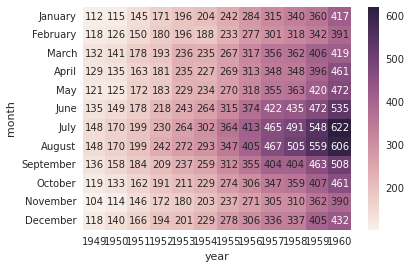

In [64]:
sns.heatmap(flight_dframe, annot = True, fmt = 'd')
# fmt = formatting

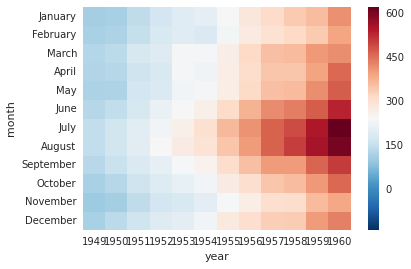

In [65]:
sns.heatmap(flight_dframe, center = flight_dframe.loc['January', 1955])

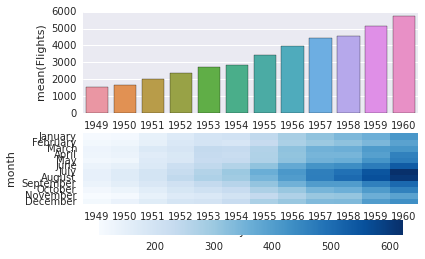

In [68]:
f, (axis1, axis2) = plt.subplots(2, 1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis = 1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', 'Flights', data = year_dframe, ax = axis1)

sns.heatmap(flight_dframe, cmap = 'Blues', ax = axis2, cbar_kws = {'orientation': 'horizontal'})

In [69]:
# clustermap will reformat the heatmap so that similar cells are next to each other

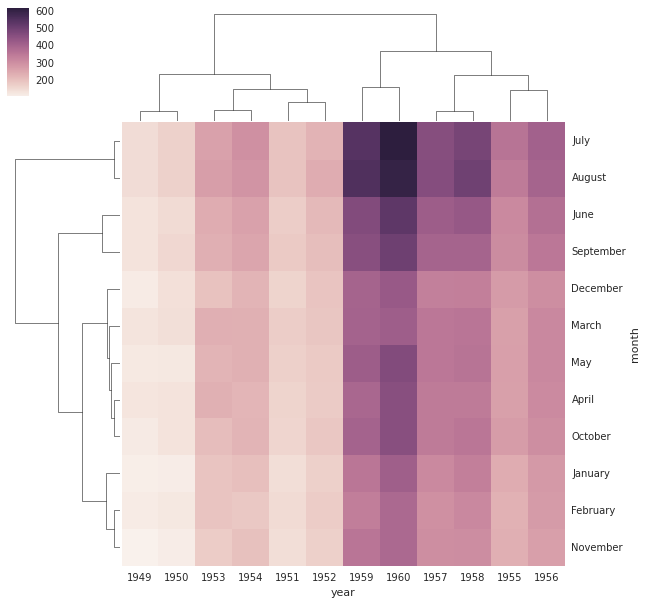

In [70]:
sns.clustermap(flight_dframe)

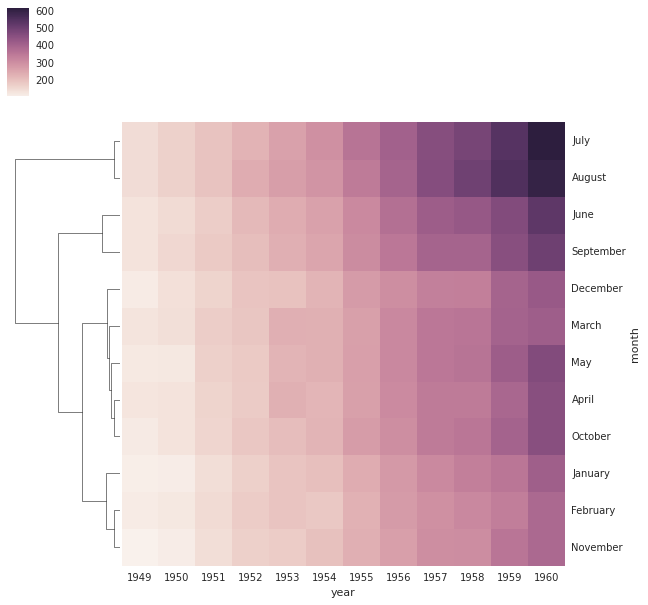

In [71]:
sns.clustermap(flight_dframe, col_cluster = False)
# cluster only by rows

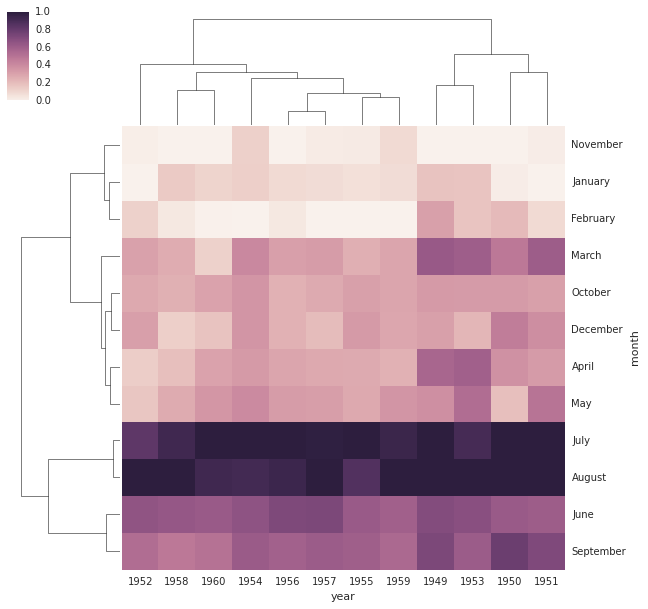

In [72]:
sns.clustermap(flight_dframe, standard_scale = 1)
# standardize by year, since number of flights every year is not same

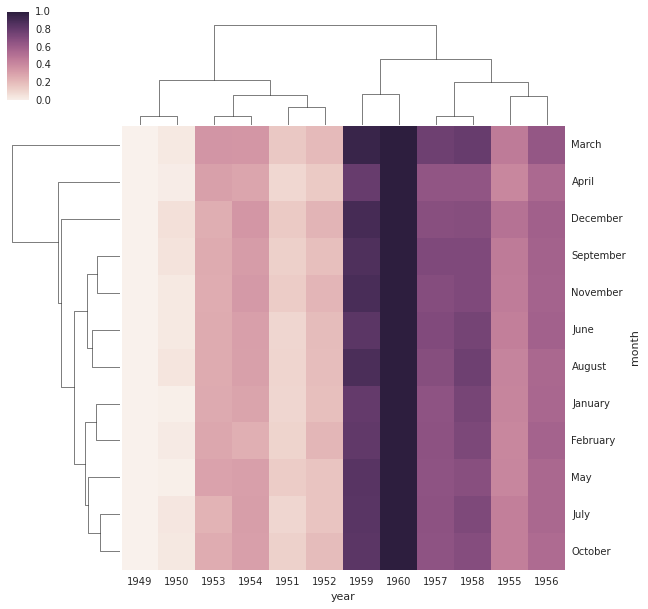

In [75]:
sns.clustermap(flight_dframe, standard_scale = 0)

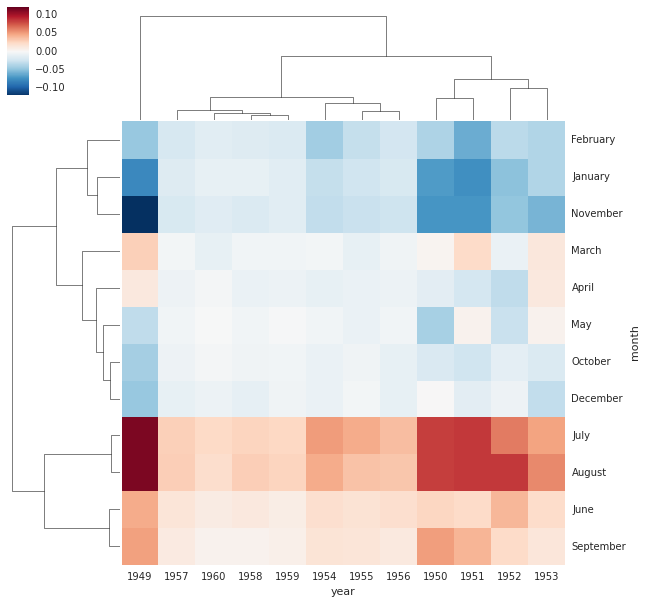

In [77]:
sns.clustermap(flight_dframe, z_score = 1)
# z_score normalizes the rows (subtract by mean and divide by stddev)